In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,6]

In [94]:
import seaborn as sns

In [95]:
import requests
from bs4 import BeautifulSoup as bs

In [96]:
from urllib.request import urlopen
import json

In [97]:
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode('utf-8')
    return json.loads(data)

In [98]:
base_url = 'https://financialmodelingprep.com/api/v3/'

In [99]:
with open(r"C:\Users\ryana\Documents\GitHub\private\stock_value_api_key.TXT","r") as file:
     apiKey = file.readline()

In [100]:
ticker = 'CLDR'

In [101]:
q_cash_flow_statement = pd.DataFrame(
    get_jsonparsed_data(
        base_url+'cash-flow-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey
    ))
q_cash_flow_statement = q_cash_flow_statement.set_index('date').iloc[:4] # extract for last 4 quarters
q_cash_flow_statement = q_cash_flow_statement.apply(pd.to_numeric, errors='coerce')

q_cash_flow_statement.iloc[:,4:].head()

,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-07-31,-35997000.0,22366000.0,0,46617000,-30318000.0,18512000,0,-1137000,135832000,76397000.0,...,19396000,1423000.0,-17754000.0,143171000.0,160925000,32448000.0,-3341000.0,29107000.0,NaN,NaN
2020-04-30,-58014000.0,22573000.0,0,53438000,-9138000.0,81828000,0,307000,118815000,84886000.0,...,-35014000,-960000.0,53287000.0,160925000.0,107638000,68357000.0,-1089000.0,67268000.0,NaN,NaN
2020-01-31,-64287000.0,-10864000.0,0,55536000,-20567000.0,-87908000,0,-8282000,127953000,115172000.0,...,-5505000,-99000.0,-5565000.0,107638000.0,113203000,-9416000.0,-715000.0,-10131000.0,NaN,NaN
2019-10-31,-82122000.0,33956000.0,0,54214000,-27069000.0,-1708000,0,7854000,148520000,66118000.0,...,4973000,1000.0,25128000.0,113203000.0,88075000,-5890000.0,-1767000.0,-7657000.0,NaN,NaN


In [102]:
cash_flow_statement = pd.DataFrame(
    get_jsonparsed_data(
        base_url+'cash-flow-statement/' + ticker + '?apikey=' + apiKey
    ))
cash_flow_statement = cash_flow_statement.set_index('date')
cash_flow_statement = cash_flow_statement.apply(pd.to_numeric, errors='coerce')
    
cash_flow_statement.iloc[:,4:].head()

,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,-336582000,92156000,0,220354000,-104066000,-8956000,0,-4089000,127953000,311666000,...,-6957000,-1607000,-51049000,107623000,158672000,-36826000,-7203000,-44029000,NaN,NaN
2019-01-31,-192649000,17428000,0,117365000,23256000,54231000,0,3795000,304397000,146568000,...,5626000,-1118000,100740000,143987000,43247000,34273000,-10086000,24187000,NaN,NaN
2018-01-31,-385793000,12102000,-806000,290006000,170525000,-28788000,0,-667000,281141000,290407000,...,247322000,1067000,-28333000,45853000,74186000,-42268000,-12954000,-55222000,NaN,NaN
2017-01-31,-187317000,10134000,0,0,-32101000,-52139000,0,530000,110616000,46155000,...,1538000,75000,53638000,89604000,35966000,-116561000,-7385000,-123946000,NaN,NaN
2016-01-31,-203143000,8586000,0,0,36862000,0,0,0,142717000,67198000,...,9663000,-334000,-323850000,-323850000,0,-90497000,-5539000,-96036000,NaN,NaN


In [103]:
ttm_cash_flow_statement = q_cash_flow_statement.sum() # sum up last 4 quarters to get TTM cash flow
cash_flow_statement = cash_flow_statement[::-1].append(ttm_cash_flow_statement.rename('TTM')).drop(['netIncome'], axis=1)
final_cash_flow_statement = cash_flow_statement[::-1] # reverse list to show most recent ones first
final_cash_flow_statement.iloc[:,4:].head()

,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,netCashProvidedByOperatingActivities,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
TTM,68031000.0,0.0,209805000.0,-87092000.0,10724000.0,0.0,-1258000.0,531120000.0,342573000.0,85499000.0,...,-16150000.0,365000.0,55096000.0,524937000.0,469841000.0,85499000.0,-6912000.0,78587000.0,0.0,0.0
2020-01-31,92156000.0,0.0,220354000.0,-104066000.0,-8956000.0,0.0,-4089000.0,127953000.0,311666000.0,-36826000.0,...,-6957000.0,-1607000.0,-51049000.0,107623000.0,158672000.0,-36826000.0,-7203000.0,-44029000.0,NaN,NaN
2019-01-31,17428000.0,0.0,117365000.0,23256000.0,54231000.0,0.0,3795000.0,304397000.0,146568000.0,34273000.0,...,5626000.0,-1118000.0,100740000.0,143987000.0,43247000.0,34273000.0,-10086000.0,24187000.0,NaN,NaN
2018-01-31,12102000.0,-806000.0,290006000.0,170525000.0,-28788000.0,0.0,-667000.0,281141000.0,290407000.0,-42268000.0,...,247322000.0,1067000.0,-28333000.0,45853000.0,74186000.0,-42268000.0,-12954000.0,-55222000.0,NaN,NaN
2017-01-31,10134000.0,0.0,0.0,-32101000.0,-52139000.0,0.0,530000.0,110616000.0,46155000.0,-116561000.0,...,1538000.0,75000.0,53638000.0,89604000.0,35966000.0,-116561000.0,-7385000.0,-123946000.0,NaN,NaN


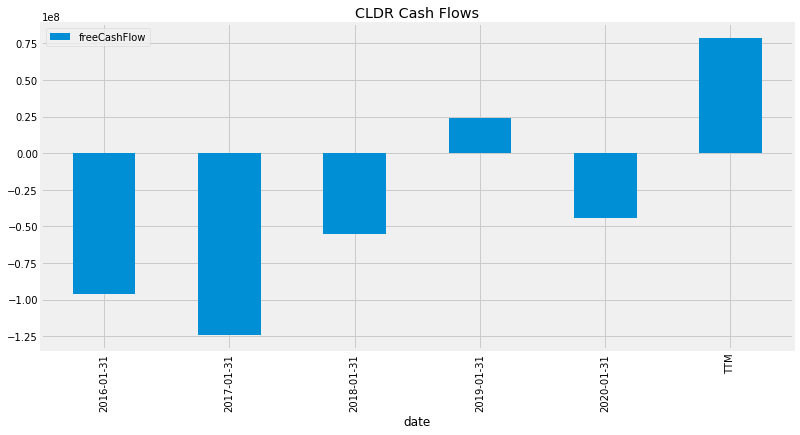

In [104]:
final_cash_flow_statement[['freeCashFlow']].iloc[::-1].iloc[-15:].plot(kind='bar', title=ticker + ' Cash Flows')
plt.show()

In [105]:
q_balance_statement = pd.DataFrame(
    get_jsonparsed_data(
        base_url+'balance-sheet-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey
    ))
q_balance_statement = q_balance_statement.set_index('date')
q_balance_statement = q_balance_statement.apply(pd.to_numeric, errors='coerce')
q_balance_statement.iloc[:,4:].head()

,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalDebt,netDebt,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-07-31,143171000,288330000,431501000,152626000,0.0,71144000,655271000,215746000,590361000,565884000,...,-1580633000,1526000.0,763000.0,1428539000,2203526000,422220000,0.0,-143171000,NaN,NaN
2020-04-30,160925000,251025000,411950000,169336000,0.0,77123000,658409000,217293000,590361000,585560000,...,-1544636000,578000.0,289000.0,1393463000,2199978000,354401000,0.0,-160925000,NaN,NaN
2020-01-31,107638000,253361000,360999000,254619000,0.0,92283000,707901000,226630000,590361000,605236000,...,-1485824000,546000.0,273000.0,1438369000,2299790000,375554000,0.0,-107638000,NaN,NaN
2019-10-31,113203000,292812000,406015000,167976000,0.0,71955000,645946000,234444000,590361000,625137000,...,-1421537000,1956000.0,978000.0,1448861000,2232915000,385679000,0.0,-113203000,NaN,NaN
2019-07-31,88075000,331763000,419838000,165867000,0.0,70888000,656593000,243019000,588742000,639229000,...,-1339415000,260000.0,130000.0,1475496000,2256375000,417175000,0.0,-88075000,NaN,NaN


In [106]:
cash_flow = final_cash_flow_statement.iloc[0]['freeCashFlow']
total_debt = q_balance_statement.iloc[0]['totalDebt'] 
cash_and_ST_investments = q_balance_statement.iloc[0]['cashAndShortTermInvestments']

print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

Free Cash Flow:  78587000.00000001
Total Debt:  0.0
Cash and ST Investments:  431501000.0


In [107]:
metric = ['Price', 'EPS next 5Y', 'Beta', 'Shs Outstand']

In [108]:
def fundamental_metric(soup, metric):
    # the table which stores the data in Finviz has html table attribute class of 'snapshot-td2'
    return soup.find(text = metric).find_next(class_='snapshot-td2').text

In [109]:
def get_finviz_data(ticker):
    try:
        url = ("http://finviz.com/quote.ashx?t=" + ticker.lower())
        soup = bs(
            requests.get(
                url,
                headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}).content
        )
        dict_finviz = {}        
        for m in metric:   
            dict_finviz[m] = fundamental_metric(soup,m)
        for key, value in dict_finviz.items():
            # replace percentages
            if (value[-1]=='%'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])
            # billion
            if (value[-1]=='B'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000000  
            # million
            if (value[-1]=='M'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000
            try:
                dict_finviz[key] = float(dict_finviz[key])
            except:
                pass 
    except Exception as e:
        print (e)
        print ('Not successful parsing ' + ticker + ' data.')        
    return dict_finviz

In [110]:
finviz_data = get_finviz_data(ticker)

In [111]:
finviz_data

{'Price': 9.79, 'EPS next 5Y': '-', 'Beta': 1.07, 'Shs Outstand': 300100000.0}

In [112]:
Beta = finviz_data['Beta']

In [114]:
discount_rate = 7
if(isinstance(Beta,str)):
    discount_rate = 7
elif(Beta<0.80):
    discount_rate = 5
elif(Beta>=0.80 and Beta<1):
    discount_rate = 6
elif(Beta>=1 and Beta<1.1):
    discount_rate = 6.5
elif(Beta>=1.1 and Beta<1.2):
    discount_rate = 7
elif(Beta>=1.2 and Beta<1.3):
    discount_rate =7.5
elif(Beta>=1.3 and Beta<1.4):
    discount_rate = 8
elif(Beta>=1.4 and Beta<1.6):
    discount_rate = 8.5
elif(Beta>=1.61):
    discount_rate = 9   

print("Discount Rate: ", discount_rate)

Discount Rate:  6.5


In [115]:
EPS_growth_5Y = finviz_data['EPS next 5Y']
EPS_growth_6Y_to_10Y = EPS_growth_5Y/2  # Half the previous growth rate, conservative estimate
EPS_growth_11Y_to_20Y  = np.minimum(EPS_growth_6Y_to_10Y, 4)  # Slightly higher than long term inflation rate, conservative estimate

In [116]:
shares_outstanding = finviz_data['Shs Outstand']

In [117]:
print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

print("EPS Growth 5Y: ", EPS_growth_5Y)
print("EPS Growth 6Y to 10Y: ", EPS_growth_6Y_to_10Y)
print("EPS Growth 11Y to 20Y: ", EPS_growth_11Y_to_20Y)

print("Discount Rate: ", discount_rate)

print("Shares Outstanding: ", shares_outstanding)

Free Cash Flow:  78587000.00000001
Total Debt:  0.0
Cash and ST Investments:  431501000.0
EPS Growth 5Y:  3
EPS Growth 6Y to 10Y:  1.5
EPS Growth 11Y to 20Y:  1.5
Discount Rate:  6.5
Shares Outstanding:  300100000.0


In [118]:
def calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate):   
    
    # Convert all percentages to decmials
    EPS_growth_5Y_d = EPS_growth_5Y/100
    EPS_growth_6Y_to_10Y_d = EPS_growth_6Y_to_10Y/100
    EPS_growth_11Y_to_20Y_d = EPS_growth_11Y_to_20Y/100
    discount_rate_d = discount_rate/100
    print("Discounted Cash Flows\n")
    
    # Lists of projected cash flows from year 1 to year 20
    cash_flow_list = []
    cash_flow_discounted_list = []
    year_list = []
    
    
    # Years 1 to 5
    for year in range(1, 6):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_5Y_d)        
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 6 to 10
    for year in range(6, 11):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_6Y_to_10Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 11 to 20
    for year in range(11, 21):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_11Y_to_20Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    intrinsic_value = (sum(cash_flow_discounted_list) - total_debt + cash_and_ST_investments)/shares_outstanding
    df = pd.DataFrame.from_dict({'Year': year_list, 'Cash Flow': cash_flow_list, 'Discounted Cash Flow': cash_flow_discounted_list})
    df.index = df.Year
    df.plot(kind='bar', title = 'Projected Cash Flows of ' + ticker)
    plt.show()

    return intrinsic_value

Discounted Cash Flows

Year 1: $76004328.63849767
Year 2: $73506533.80061278
Year 3: $71090826.11702456
Year 4: $68754507.88782656
Year 5: $66494970.069916785
Year 6: $63373140.489169516
Year 7: $60397875.677471414
Year 8: $57562294.65974975
Year 9: $54859839.511404686
Year 10: $52284260.19162043
Year 11: $49829600.088727444
Year 12: $47490182.24418625
Year 13: $45260596.223332435
Year 14: $43135685.6025187
Year 15: $41110536.04371501
Year 16: $39180463.9289866
Year 17: $37341005.52856469
Year 18: $35587906.67745837
Year 19: $33917112.93673263
Year 20: $32324760.216698226


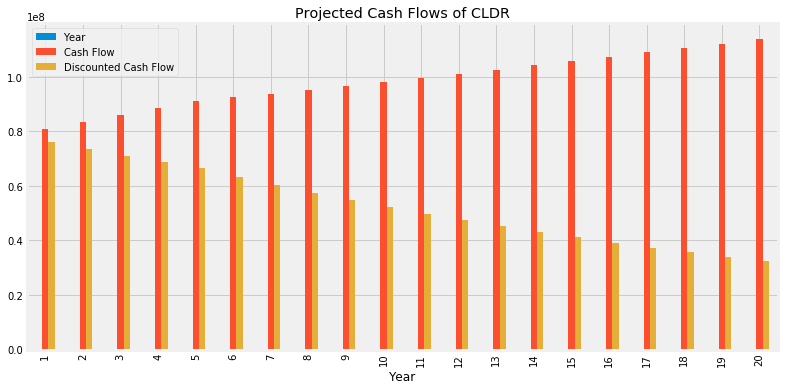

In [119]:
intrinsic_value = calculate_intrinsic_value(cash_flow, 
                                            total_debt, 
                                            cash_and_ST_investments,
                                            EPS_growth_5Y, 
                                            EPS_growth_6Y_to_10Y,
                                            EPS_growth_11Y_to_20Y,
                                            shares_outstanding,
                                            discount_rate)

In [120]:
print("Intrinsic Value: ", intrinsic_value)
current_price = finviz_data['Price']
print("Current Price: ", current_price)

margin_of_safety = (1-current_price/intrinsic_value)*100
print("Margin of Safety: ", margin_of_safety)
print("---------------------------------------------------")

if intrinsic_value >= 0:
    if margin_of_safety < 0:
        print("Current share price is higher than the intrinsic value.")
    elif margin_of_safety > 0:
        print("Current share price is lower than the intrinsic value.")
    else:
        print("Current share price is equal to the intrinsic value.")
else:
    if margin_of_safety > 0:
        print("Current share price is higher than the intrinsic value.")
    elif margin_of_safety < 0:
        print("Current share price is lower than the intrinsic value.")
    else:
        print("Current share price is equal to the intrinsic value.")

Intrinsic Value:  4.935046406311944
Current Price:  9.79
Margin of Safety:  -98.3770605982256
---------------------------------------------------
Current share price is higher than the intrinsic value.
